# 创建神经网络

In [2]:
import tensorflow as tf
import numpy as np
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs=activation_function(Wx_plus_b)
    return outputs

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5+noise

xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),
                                    reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data, ys:y_data})
    if i%50 == 0:
        #print(sess.run(loss, feed_dict={xs:x_data,ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs:x_data})
        lines = ax.plot(x_data,prediction_value,'r-',lw=5)
        plt.pause(0.1)

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
#plt.show()

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i%50 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.ion()
        plt.pause(0.1)


NameError: name 'ax' is not defined

# 可视化

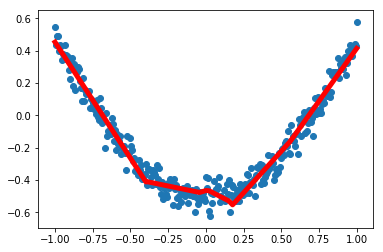

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
#plt.show()

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i%50 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)
    

In [7]:
# View more python learning tutorial on my Youtube and Youku channel!!!

# Youtube video tutorial: https://www.youtube.com/channel/UCdyjiB5H8Pu7aDTNVXTTpcg
# Youku video tutorial: http://i.youku.com/pythontutorial

"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

##plt.scatter(x_data, y_data)
##plt.show()

# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1],name='x_input')
    ys = tf.placeholder(tf.float32, [None, 1],name='y_input')
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
# important step
sess = tf.Session()
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
#plt.show()

%matplotlib inline

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(1)

# 优化器

# Tensorboard

In [15]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
    with tf.name_scope('new_layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]))
        with tf.name_scope('bias'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.matmul(inputs, Weights) + biases
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

# Make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

##plt.scatter(x_data, y_data)
##plt.show()

# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1],name='x_input')
    ys = tf.placeholder(tf.float32, [None, 1],name='y_input')
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediction and real data
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
# important step
sess = tf.Session()
writer = tf.summary.FileWriter('graph',sess.graph)
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)



In [13]:
import tensorflow as tf

a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a, b, name="mul_c")
d = tf.add(a, b, name="add_d")
e = tf.add(c, d, name="add_e")

sess = tf.Session()
sess.run(e)

writer = tf.summary.FileWriter("logs", tf.get_default_graph())
writer.close()

# Classification

In [6]:
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

def compute_accuracy(v_xs,v_ys):
    global prediction
    y_pre = sess.run(prediction,feed_dict={xs:v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1),tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    result = sess.run(accuracy, feed_dict={xs:v_xs,ys:v_ys})
    return result


xs = tf.placeholder(tf.float32, [None, 784])
ys = tf.placeholder(tf.float32, [None,10])
prediction = add_layer(xs,784,10,activation_function=tf.nn.softmax)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction),
                                              reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(1000):
    batch_xs,batch_ys = mnist.train.next_batch(100)
    sess.run(train_step,feed_dict = {xs:batch_xs,ys:batch_ys})
    if i%50 == 0:
        print(compute_accuracy(mnist.test.images,mnist.test.labels))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.1471
0.6421
0.7418
0.7823
0.8032
0.8186
0.8329
0.8386
0.8432
0.8493
0.8535
0.8559
0.8616
0.8646
0.8642
0.8662
0.8673
0.8664
0.8739
0.8744


# 过拟合 dropout

In [ ]:
from tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

#load data
digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

def add_layer(inputs, in_size, out_size, layer_name,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    tf.histogram_summary(layer_name + '\outputs',outputs)
    return outputs

xs = tf.placeholder(tf.float32, [None, 784])
ys = tf.placeholder(tf.float32, [None,10])


[1.307241 2.137237 3.382485]
